<a href="https://colab.research.google.com/github/Choi-yu-jin/pytorch/blob/main/basic_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치로 구현하는 신경망

## 신경망 모델 구현하기

In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

x_train, y_train 데이터셋은 신경망 학습에 쓰이는 데이터와 레이블
x_test, y_test 데이터셋은 학습이 끝난 신경망의 성능 평가 및 실험


In [3]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

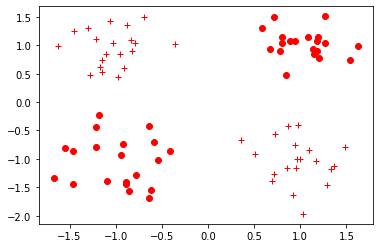

In [4]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [5]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [6]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)
            return output

In [7]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [8]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7778376340866089


In [9]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.8151230812072754
Train loss at 100 is 0.6691346168518066
Train loss at 200 is 0.5853686332702637
Train loss at 300 is 0.5037266612052917
Train loss at 400 is 0.42662185430526733
Train loss at 500 is 0.3507891595363617
Train loss at 600 is 0.27669039368629456
Train loss at 700 is 0.21032658219337463
Train loss at 800 is 0.15911714732646942
Train loss at 900 is 0.1212899312376976
Train loss at 1000 is 0.0948132872581482
Train loss at 1100 is 0.07665000855922699
Train loss at 1200 is 0.06364074349403381
Train loss at 1300 is 0.05399470403790474
Train loss at 1400 is 0.04664420336484909
Train loss at 1500 is 0.040891870856285095
Train loss at 1600 is 0.03629378229379654
Train loss at 1700 is 0.03254694491624832
Train loss at 1800 is 0.02944435179233551
Train loss at 1900 is 0.02683916687965393


In [10]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.015038417652249336


In [11]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.5768,  1.7543],
        [-1.5755,  1.9118],
        [ 1.3231, -0.5825],
        [ 1.1409, -0.8708],
        [-1.3966, -0.8367]])), ('linear_1.bias', tensor([-0.1646, -0.2613,  0.5308, -0.1601,  0.6050])), ('linear_2.weight', tensor([[-2.2030,  2.3661,  1.3229,  1.2192, -1.6021]])), ('linear_2.bias', tensor([-0.2288]))])


In [12]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9959676265716553
